In [1]:
import tensorflow as tf
import rasterio
import numpy as np
from sklearn.preprocessing import minmax_scale
import cv2
import os
import shutil

import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split
%matplotlib inline
        
print(f'TensorFlow built with cuda? {tf.test.is_built_with_cuda()}')
print(f'TensorFlow built with GPU support? {tf.test.is_built_with_gpu_support()}')

2024-06-22 20:07:40.425263: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-22 20:07:40.459695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow built with cuda? True
TensorFlow built with GPU support? True


In [2]:
base_dir = './images/overlap'

images_dir ='./images/overlap/tiles'
masks_dir = './images/overlap/masks'

images_listdir = [img for img in os.listdir(images_dir) if img.endswith('jpg')]
masks_listdir = [img for img in os.listdir(masks_dir) if img.endswith('jpg')]

print(len(images_listdir))
print(len(masks_listdir))

159
159


In [3]:
img_train, img_test = train_test_split(images_listdir, test_size=0.20)
len(img_train)

127

In [4]:
masks_train, masks_test = train_test_split(masks_listdir, test_size=0.20)
len(masks_train)

127

In [5]:
img_train_path = os.path.join(images_dir, 'train')

if not os.path.isdir(img_train_path):
    os.makedirs(img_train_path)

for img in img_train:
    src = os.path.join(images_dir, img)
    dst = os.path.join(img_train_path, img)
    shutil.copyfile(src, dst)


img_test_path = os.path.join(images_dir, 'test')

if not os.path.isdir(img_test_path):
    os.makedirs(img_test_path)

for img in img_test:
    src = os.path.join(images_dir, img)
    dst = os.path.join(img_test_path, img)
    shutil.copyfile(src, dst)

In [6]:
masks_train_path = os.path.join(masks_dir, 'train')

if not os.path.isdir(masks_train_path):
    os.makedirs(masks_train_path)

for img in masks_train:
    src = os.path.join(masks_dir, img)
    dst = os.path.join(masks_train_path, img)
    shutil.copyfile(src, dst)

masks_test_path = os.path.join(masks_dir, 'test')

if not os.path.isdir(masks_test_path):
    os.makedirs(mask_test_path)

for img in masks_test:
    src = os.path.join(masks_dir, img)
    dst = os.path.join(masks_test_path, img)
    shutil.copyfile(src, dst)

In [7]:
random_images = np.random.choice(images_listdir, size = 9, replace = False)

In [8]:
image_size = 1024
input_image_size = (1024, 1024)

def read_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (image_size, image_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

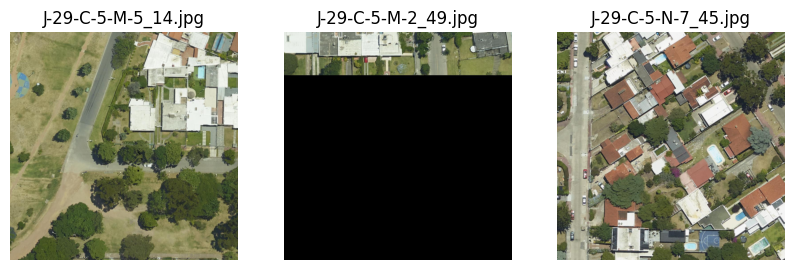

In [9]:
rows = 1
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        input_path = f"{images_dir}/{random_images[i]}"
        img = read_image(input_path)
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

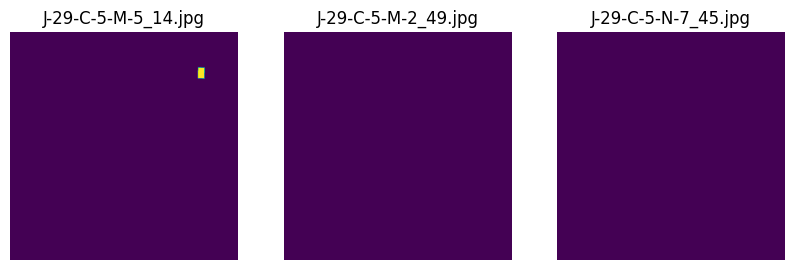

In [10]:
fig, ax = plt.subplots(rows, cols, figsize = (10,10))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        file=random_images[i]
        if os.path.exists(os.path.join(masks_dir,file)):
            img = read_image(f"{masks_dir}/{file}")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ax.set_title(f"{random_images[i]}")
            ax.imshow(img)
            ax.axis('off')
        else:
            print('not exist')

In [11]:
masks_listdir

['J-29-C-5-M-9_54.jpg',
 'J-29-C-5-M-5_14.jpg',
 'J-29-C-5-N-7_2.jpg',
 'J-29-C-5-M-2_29.jpg',
 'J-29-C-5-N-7_9.jpg',
 'J-29-C-5-M-9_82.jpg',
 'J-29-C-5-O-3_30.jpg',
 'J-29-C-5-M-2_39.jpg',
 'J-29-C-5-N-5_88.jpg',
 'J-29-C-5-O-3_81.jpg',
 'J-29-C-5-N-5_78.jpg',
 'J-29-C-5-M-9_46.jpg',
 'J-29-C-5-O-3_92.jpg',
 'J-29-C-5-N-7_4.jpg',
 'J-29-C-5-N-6_5.jpg',
 'J-29-C-5-M-9_34.jpg',
 'J-29-C-5-M-9_75.jpg',
 'J-29-C-5-N-7_24.jpg',
 'J-29-C-5-M-9_94.jpg',
 'J-29-C-5-N-7_14.jpg',
 'J-29-C-5-O-3_40.jpg',
 'J-29-C-5-M-5_31.jpg',
 'J-29-C-5-N-5_66.jpg',
 'J-29-C-5-M-5_43.jpg',
 'J-29-C-5-N-7_5.jpg',
 'J-29-C-5-N-7_36.jpg',
 'J-29-C-5-M-9_88.jpg',
 'J-29-C-5-N-5_87.jpg',
 'J-29-C-5-M-9_45.jpg',
 'J-29-C-5-N-7_45.jpg',
 'J-29-C-5-N-7_27.jpg',
 'J-29-C-5-N-7_7.jpg',
 'J-29-C-5-N-7_46.jpg',
 'J-29-C-5-M-9_83.jpg',
 'J-29-C-5-O-3_70.jpg',
 'J-29-C-5-N-8_51.jpg',
 'J-29-C-5-M-9_38.jpg',
 'J-29-C-5-N-5_97.jpg',
 'J-29-C-5-P-1_12.jpg',
 'J-29-C-5-M-9_97.jpg',
 'J-29-C-5-M-9_33.jpg',
 'J-29-C-5-M-5_33.jpg'

In [12]:
MASKS = np.zeros((1,image_size, image_size, 1), dtype=bool)
IMAGES = np.zeros((1,image_size, image_size, 3), dtype=np.uint8)


for j, file in enumerate(img_train):   ##the smaller, the faster
    image = read_image(f"{img_train_path}/{file}")
    image_ex = np.expand_dims(image, axis=0)
    IMAGES = np.vstack([IMAGES, image_ex])
    file2 = file[0:-4]+'.jpg'
    mask = read_image(f"{masks_dir}/{file2}")
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.reshape(1024, 1024, 1)
    mask_ex = np.expand_dims(mask, axis=0)
    MASKS = np.vstack([MASKS, mask_ex])

In [13]:
TMASKS = np.zeros((1,image_size, image_size,1), dtype=bool)
TIMAGES = np.zeros((1,image_size, image_size,3),dtype=np.uint8)

for j, file in enumerate(img_test):
    image = read_image(f"{img_test_path}/{file}")
    image_ex = np.expand_dims(image, axis=0)
    TIMAGES = np.vstack([TIMAGES, image_ex])
    file2 = file[0:-4]+'.jpg'
    mask = read_image(f"{masks_dir}/{file2}")
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    mask = mask.reshape(1024, 1024, 1)
    mask_ex = np.expand_dims(mask, axis=0)
    TMASKS = np.vstack([TMASKS, mask_ex])

In [14]:
images=np.array(IMAGES)
masks=np.array(MASKS)
print('Train')
print(images.shape, masks.shape)

test_images=np.array(TIMAGES)
test_masks=np.array(TMASKS)

print('Test')
print(test_images.shape, test_masks.shape)

Train
(128, 1024, 1024, 3) (128, 1024, 1024, 1)
Test
(33, 1024, 1024, 3) (33, 1024, 1024, 1)


In [15]:
images_train, images_test, masks_train, masks_test = train_test_split(
    images, masks, test_size=0.2, random_state=42)

In [16]:
print(len(images_train), len(masks_train))

102 102


In [17]:
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam

def iou_coeff(y_true, y_pred):
    # Calcula la intersección entre el y_true y y_pred
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    # Calcula la unión
    union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
    # Calcula el coeficiente de IoU
    iou = (intersection + K.epsilon()) / (union + K.epsilon())
    return iou

def conv_block(input, num_filters):
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    conv = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(conv)
    conv = tf.keras.layers.BatchNormalization()(conv)
    conv = tf.keras.layers.Activation("relu")(conv)
    return conv

def encoder_block(input, num_filters):
    skip = conv_block(input, num_filters)
    pool = tf.keras.layers.MaxPool2D((2,2))(skip)
    return skip, pool

def decoder_block(input, skip, num_filters):
    up_conv = tf.keras.layers.Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(input)
    conv = tf.keras.layers.Concatenate()([up_conv, skip])
    conv = conv_block(conv, num_filters)
    return conv

def Unet(input_shape):
    inputs = tf.keras.layers.Input(input_shape)

    skip1, pool1 = encoder_block(inputs, 64)
    skip2, pool2 = encoder_block(pool1, 128)
    skip3, pool3 = encoder_block(pool2, 256)
    skip4, pool4 = encoder_block(pool3, 512)

    bridge = conv_block(pool4, 1024)

    decode1 = decoder_block(bridge, skip4, 512)
    decode2 = decoder_block(decode1, skip3, 256)
    decode3 = decoder_block(decode2, skip2, 128)
    decode4 = decoder_block(decode3, skip1, 64)
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation="sigmoid")(decode4)
    model = tf.keras.models.Model(inputs, outputs, name="U-Net")
    return model

In [18]:
unet_model = Unet((1024, 1024, 3))
unet_model.compile(optimizer='adam', loss='binary_crossentropy')
unet_model.summary()

2024-06-22 20:07:53.799300: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-06-22 20:07:53.799321: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: d5d459d49525
2024-06-22 20:07:53.799324: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: d5d459d49525
2024-06-22 20:07:53.799389: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 545.23.6
2024-06-22 20:07:53.799400: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 535.161.8
2024-06-22 20:07:53.799403: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:251] kernel version 535.161.8 does not match DSO version 545.23.6 -- cannot find working devices in this configuration


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1024,      │          0 │ -                 │
│ (InputLayer)        │ 1024, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 1024,      │      1,792 │ input_layer[0][0] │
│                     │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1024,      │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1024,      │          0 │ batch_normalizat… │
│ (Activation)        │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1024,      │     36,928 │ activation[0][0]  │
│                     │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1024,      │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 1024,      │          0 │ batch_normalizat… │
│ (Activation)        │ 1024, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 512, 512,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 512,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 512, 512,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 256, 256,  │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 256,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [19]:
unet_result = unet_model.fit(
    images_train, masks_train,
    validation_split = 0.2, batch_size = 4, epochs =3)

Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1090s 52s/step - loss: -39.0664 - val_loss: -32632070.0000
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1070s 51s/step - loss: -97.3456 - val_loss: -380645.9062
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 967s 46s/step - loss: -92.4742 - val_loss: -125194.6250


In [21]:
unet_model.save('./modelos/unet_1024_3epochs_cpu.kerasNVIDIA GeForce GTX 1650 with Max-Q Design')